<a href="https://colab.research.google.com/github/NancyAmer0/Regression/blob/main/house_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import math

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#Import Data

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df = pd.read_table(url, sep='\\s+', header=None)

#EDA

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
df[df.isna().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df['ZN'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [ ]:
df['TAX'].unique() #change dt

array([296., 242., 222., 311., 307., 279., 252., 233., 243., 469., 226.,
       313., 256., 284., 216., 337., 345., 305., 398., 281., 247., 270.,
       276., 384., 432., 188., 437., 403., 193., 265., 255., 329., 402.,
       348., 224., 277., 300., 330., 315., 244., 264., 223., 254., 198.,
       285., 241., 293., 245., 289., 358., 304., 287., 430., 422., 370.,
       352., 351., 280., 335., 411., 187., 334., 666., 711., 391., 273.])

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df[df['ZN']==0].shape[0] #totally normal

372

#Univariant analysis

CRIM: Per Capita Crime Rate by Town
Indicates the prevalence of crime in the area.
Higher values suggest more crime, which could negatively impact housing prices.


---



ZN: Proportion of Residential Land Zoned for Lots Over 25,000 sq. ft.
Reflects the proportion of large residential plots in the area.

Higher values indicate a prevalence of spacious residential zones, often associated with wealthier neighborhoods and higher housing prices.

---



INDUS: Proportion of Non-Retail Business Acres per Town

Measures the level of industrial activity in the area.

Higher values may indicate industrial or commercial zones, which can negatively impact the desirability of nearby housing.

---



CHAS: Charles River Dummy Variable (1 if tract bounds river; 0 otherwise)

Binary variable indicating whether the property is near the Charles River.

Properties near the river are often considered more desirable and may have higher prices.


---



NOX: Nitric Oxides Concentration (Parts Per 10 Million)

Indicates the level of air pollution in the area.

Higher values suggest more pollution, which can negatively affect housing prices.

---



RM: Average Number of Rooms per Dwelling

A measure of the size of houses in the area.

Higher values indicate larger homes, which generally correlate with higher property values.


---



AGE: Proportion of Owner-Occupied Units Built Before 1940

Indicates the age of housing stock in the area.

Higher values suggest older neighborhoods, which may have either historic charm or higher maintenance needs, depending on context.

---



DIS: Weighted Distances to Five Boston Employment Centers

A measure of accessibility to major employment hubs.

Higher values indicate greater distances, which may negatively impact housing prices due to reduced convenience.

---



RAD: Index of Accessibility to Radial Highways

Reflects how easily the area connects to major highways.

Higher values indicate better accessibility, which may positively influence housing prices.


---



TAX: Full-Value Property Tax Rate per $10,000

Indicates the level of property taxes in the area.

Higher taxes could make housing less attractive, but they might also reflect better-funded public services.

---



PTRATIO: Pupil-Teacher Ratio by Town

Measures the quality of education in the area (lower ratios often imply better schools).

Lower values are associated with higher housing prices due to the desirability of good schools.

---



B: Proportion of Population of African American Descent

A socio-economic variable. Higher values indicate a smaller deviation from 0.63,
which may historically relate to racial diversity in the area. (Interpretation may vary by context.)

---



LSTAT: Percentage of Lower Status Population

Represents the socio-economic status of residents in the area.

Higher values indicate a higher proportion of lower-income households, which can negatively impact housing prices.

---



MEDV: Median Value of Owner-Occupied Homes (in $1,000s)

The target variable for prediction.

Represents the median home price in thousands of dollars.

---



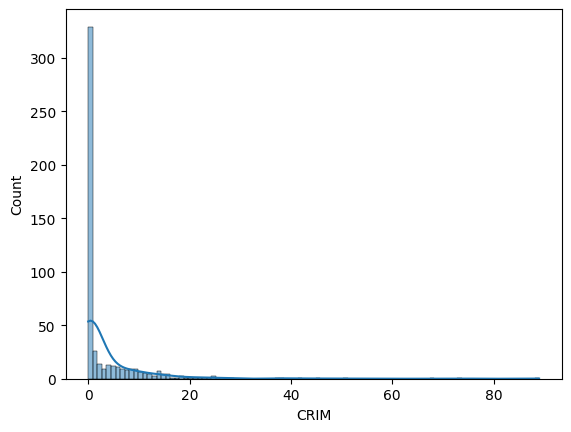

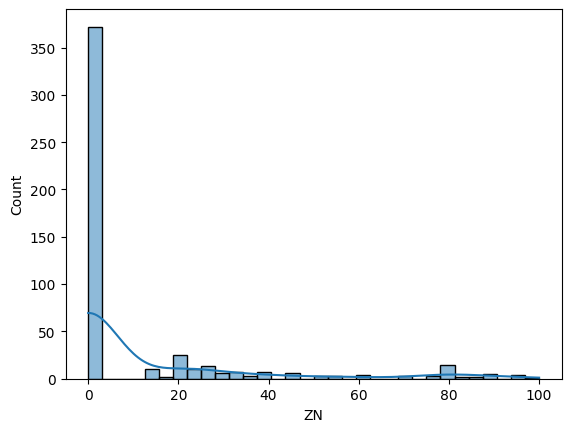

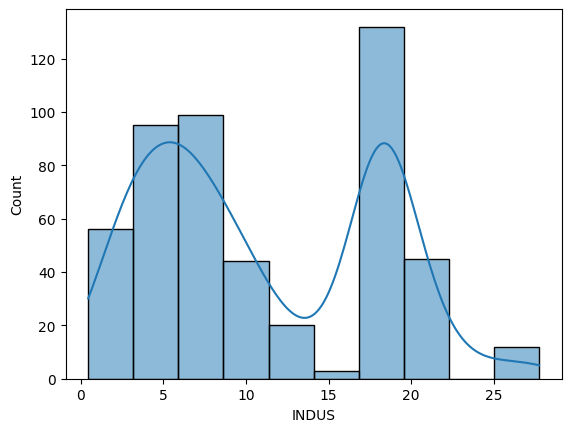

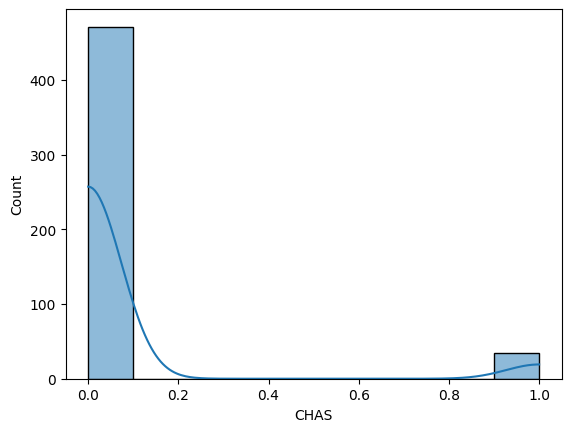

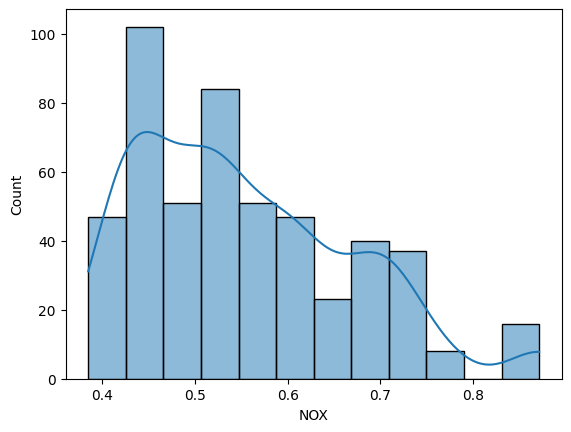

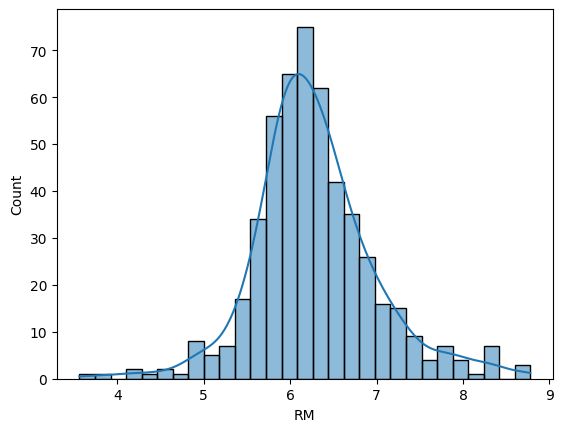

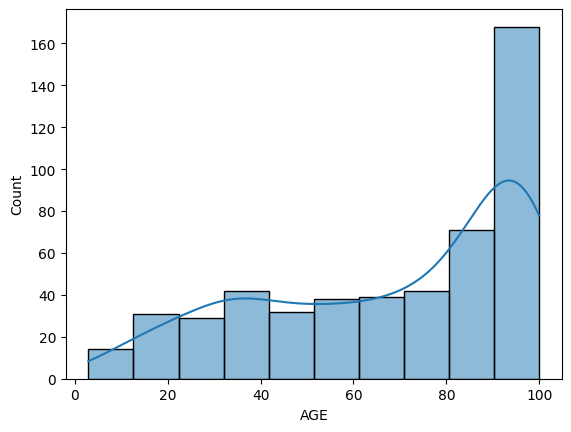

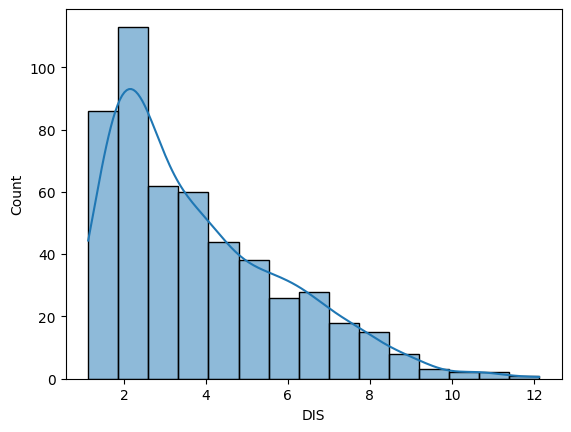

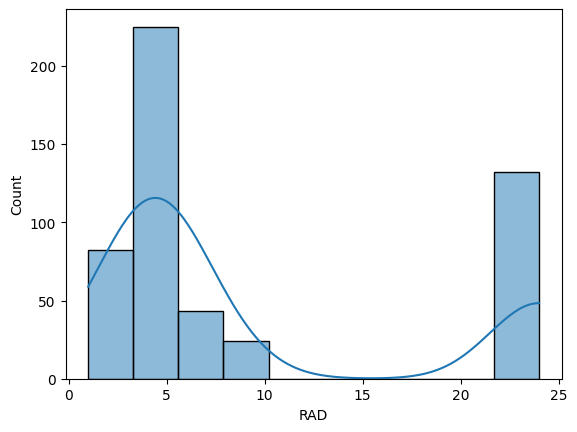

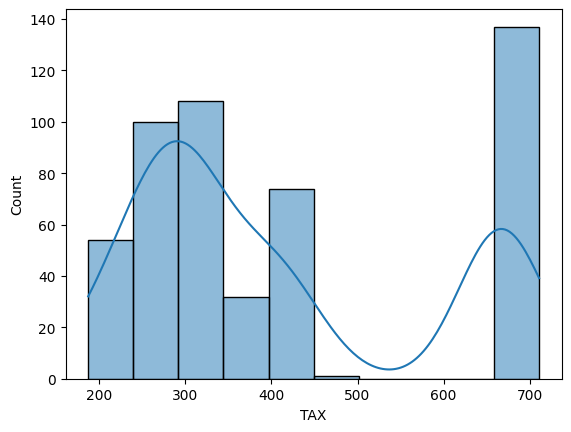

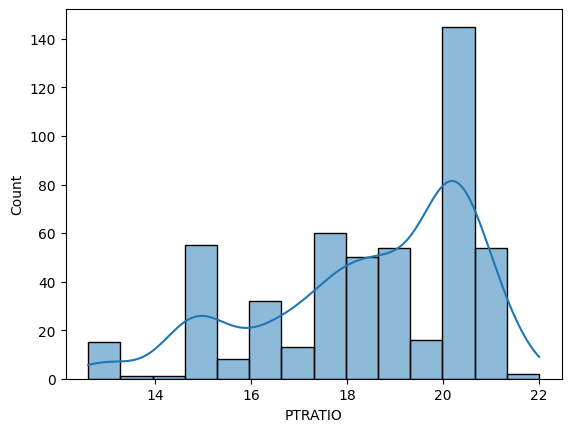

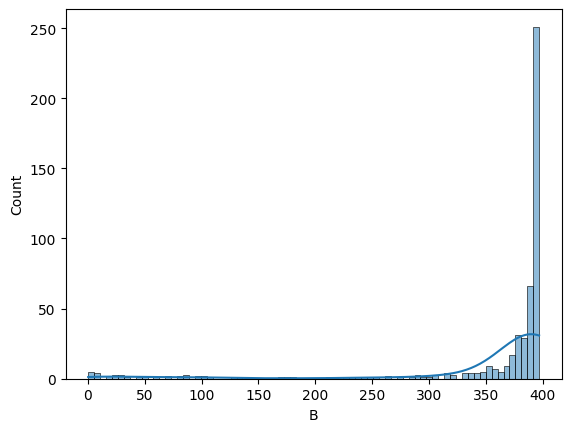

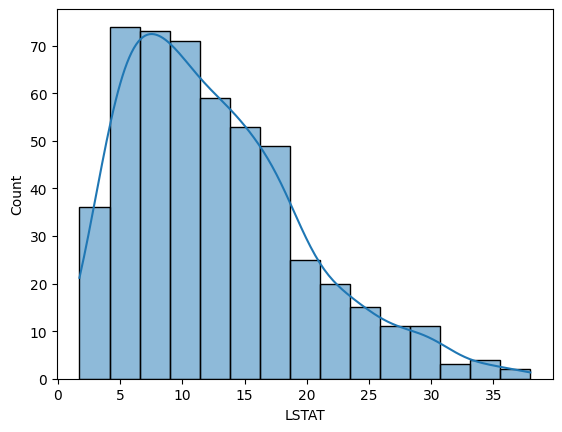

In [ ]:
for i in df.iloc[:,:-1].columns:
  sns.histplot(data=df, x=i, kde=True)
  plt.show()

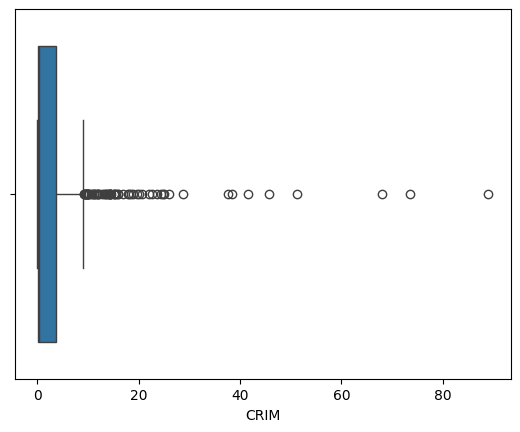

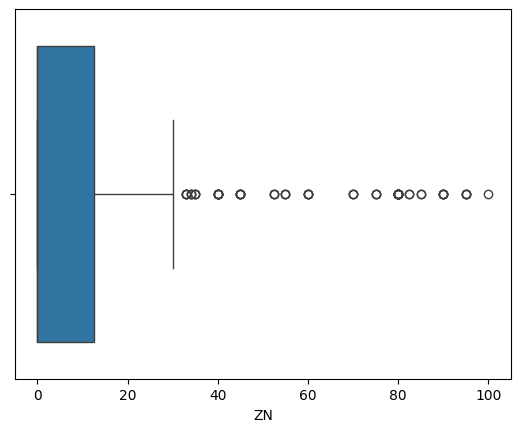

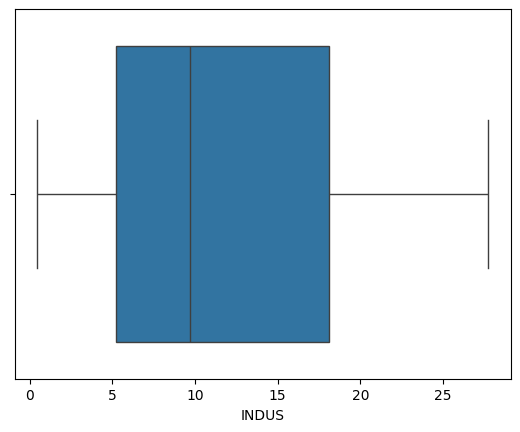

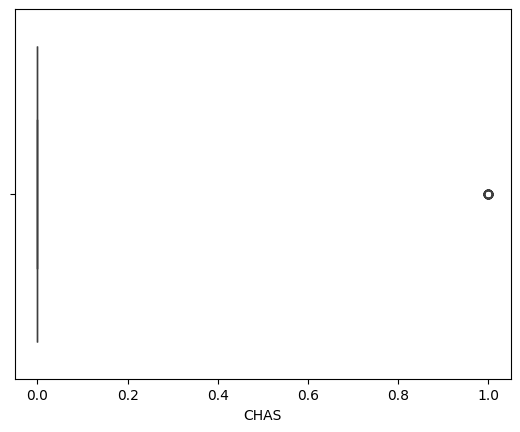

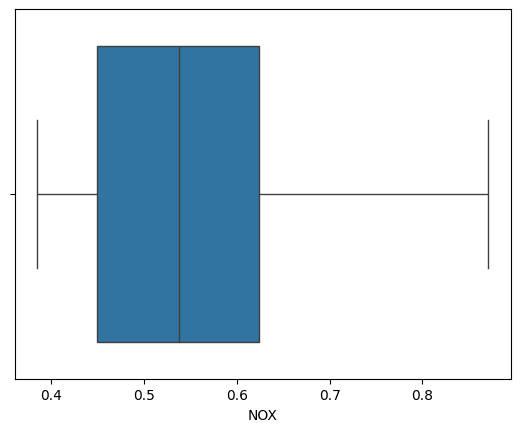

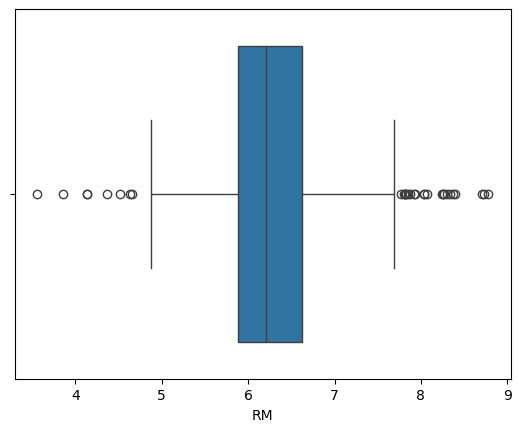

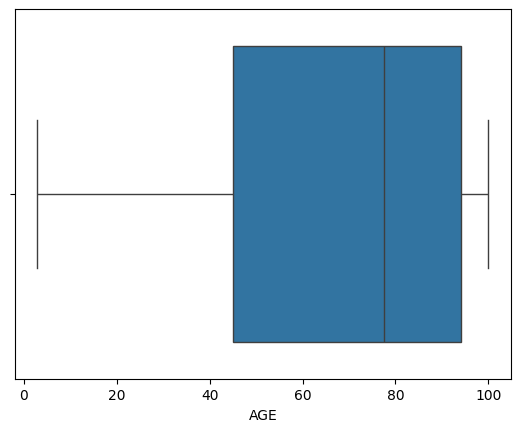

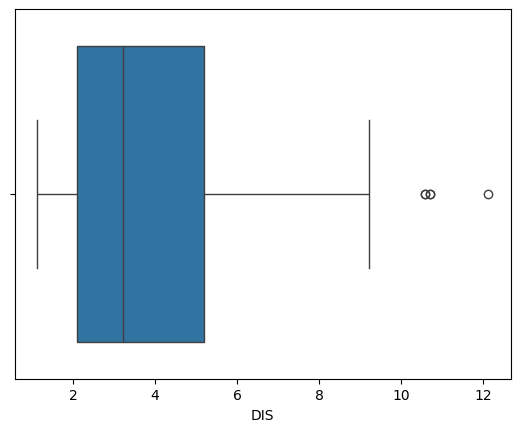

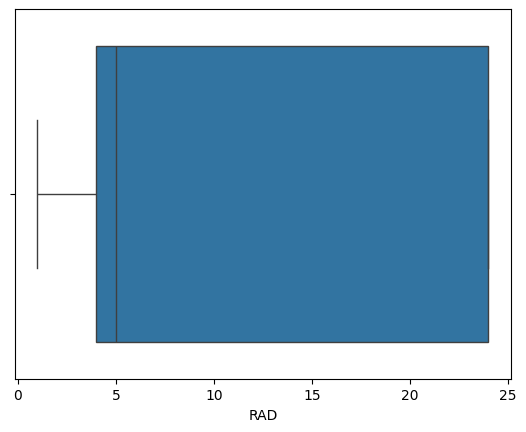

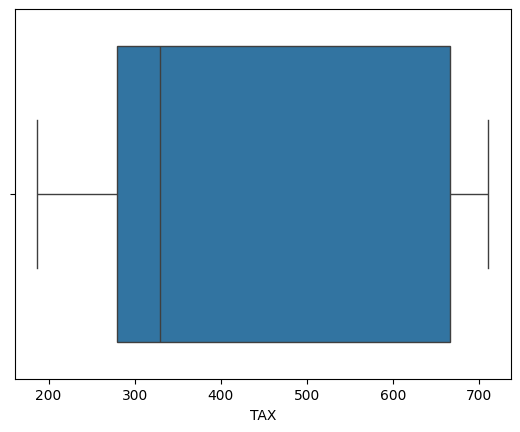

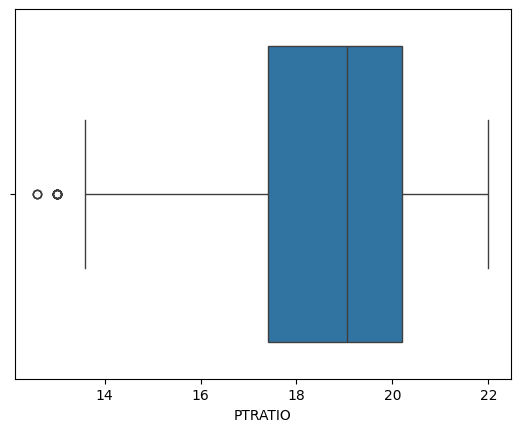

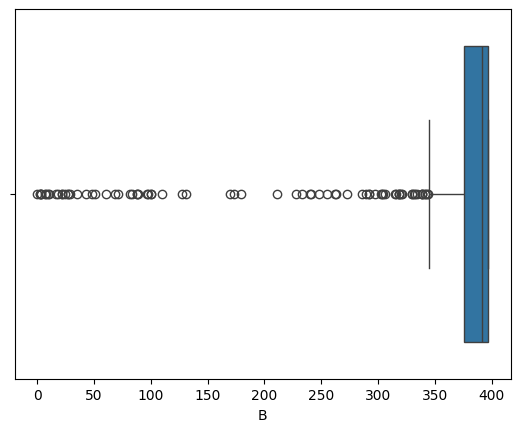

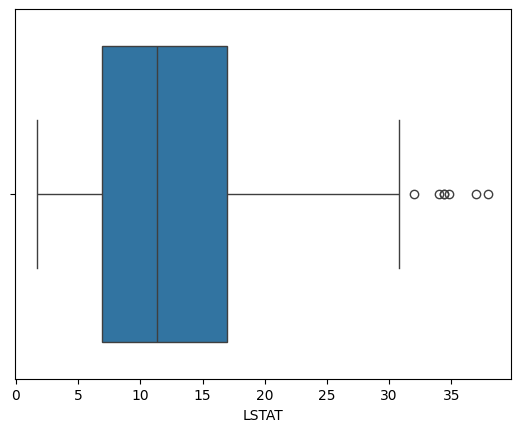

In [ ]:
for i in df.iloc[:,:-1].columns:
  sns.boxplot(data=df, x=i)
  plt.show()

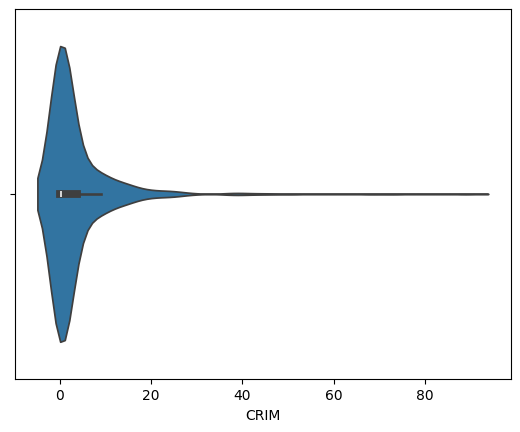

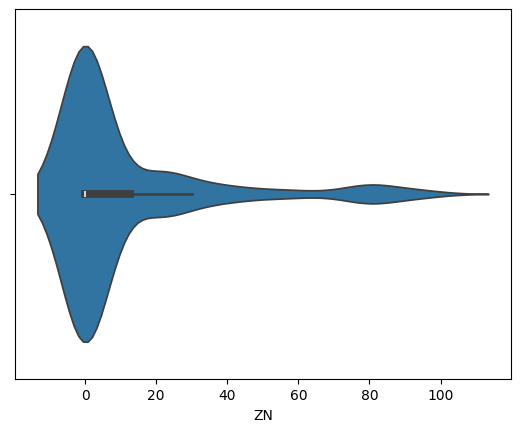

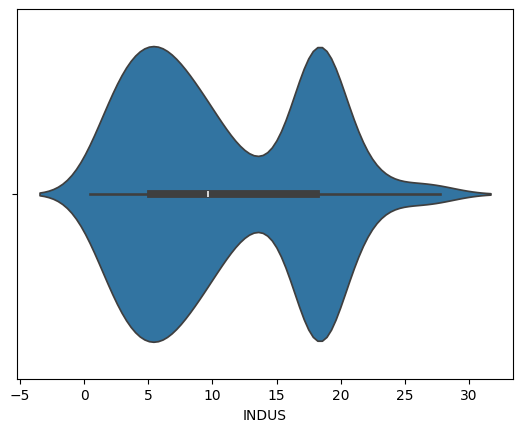

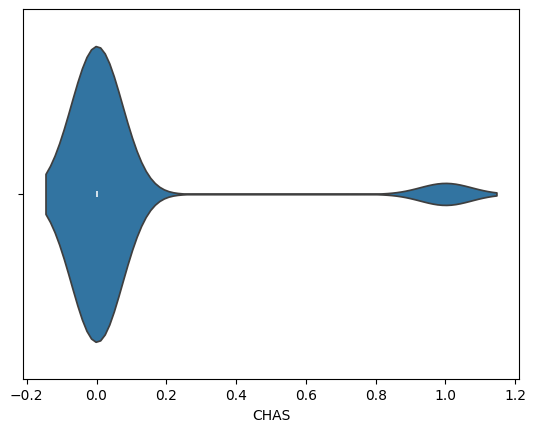

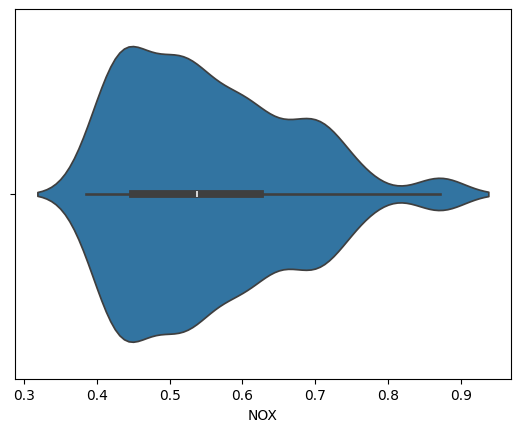

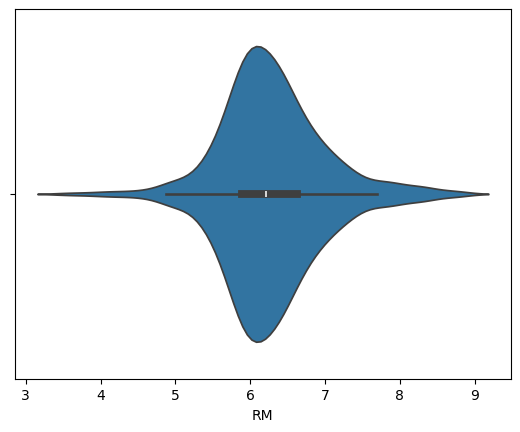

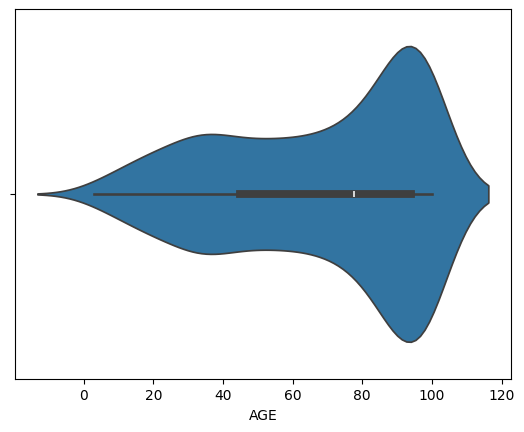

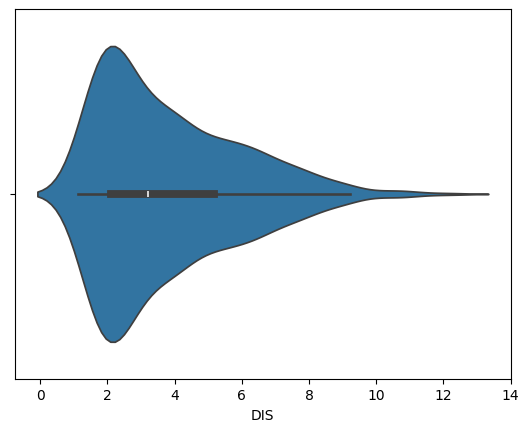

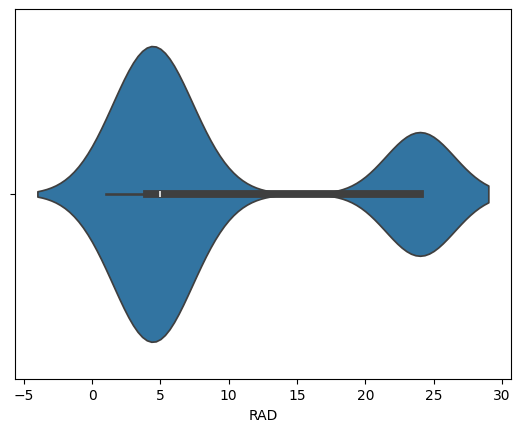

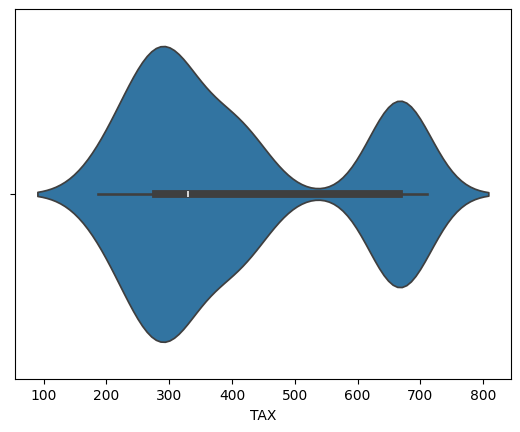

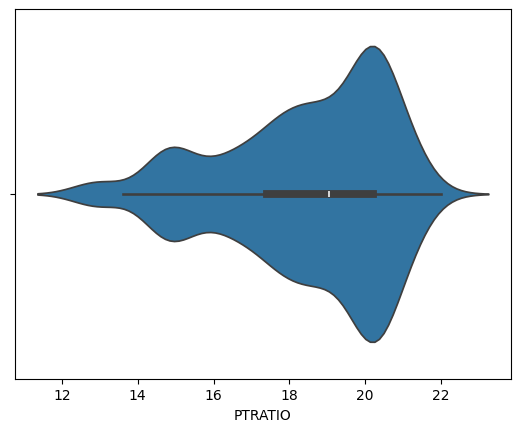

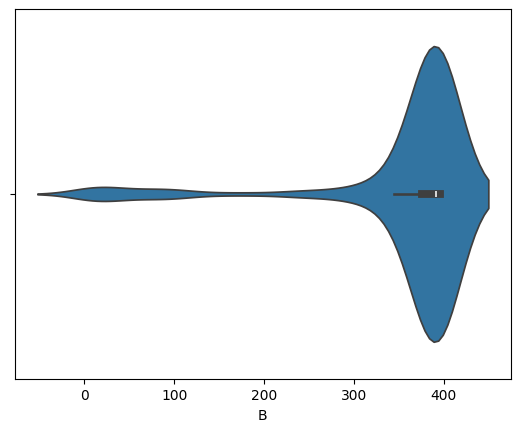

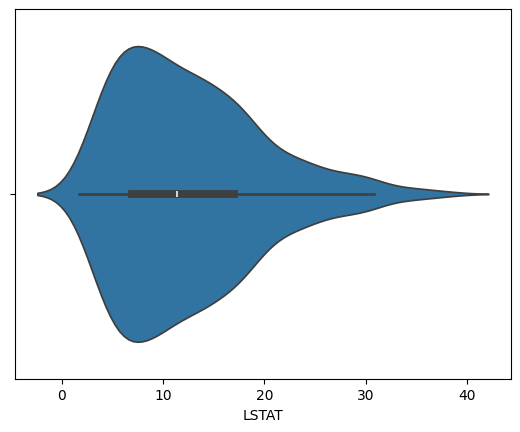

In [ ]:
for i in df.iloc[:,:-1].columns:
  sns.violinplot(data=df, x=i)
  plt.show()

#Bivariate Analysis

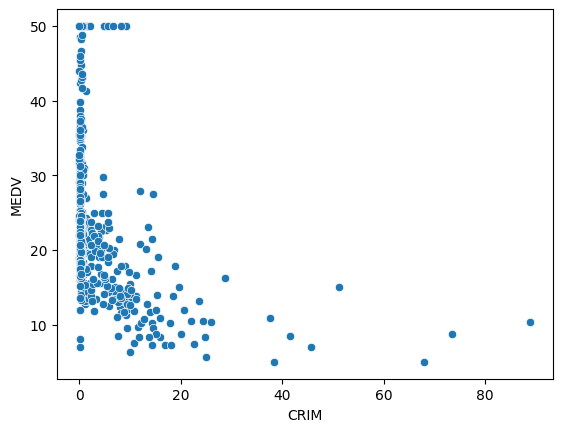

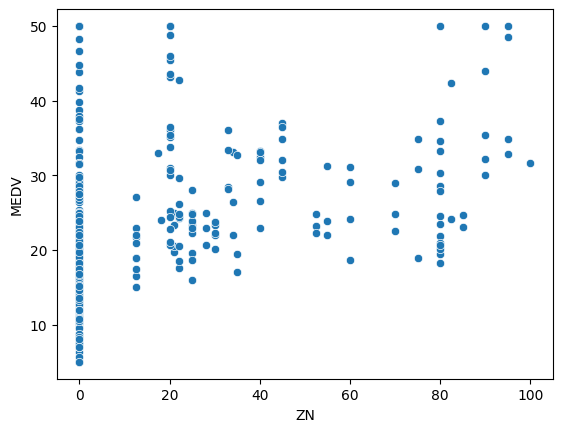

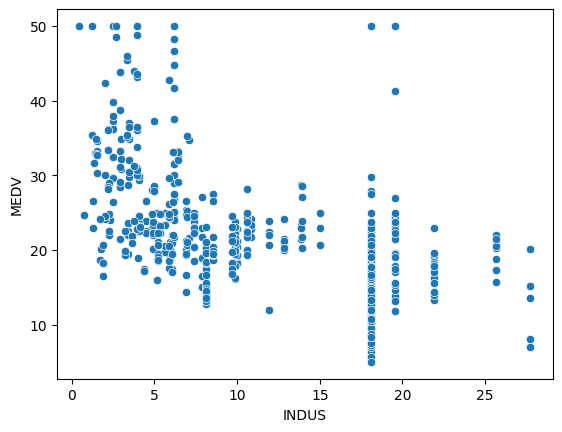

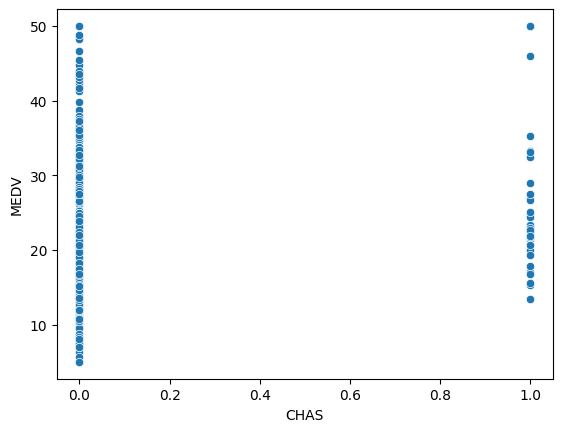

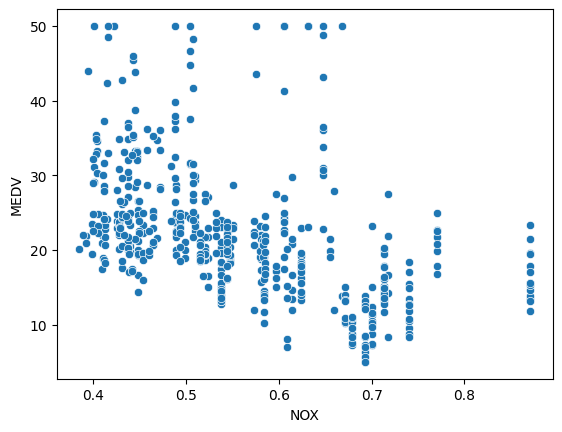

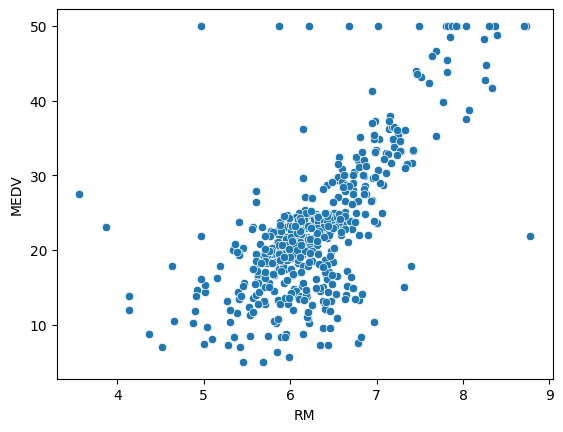

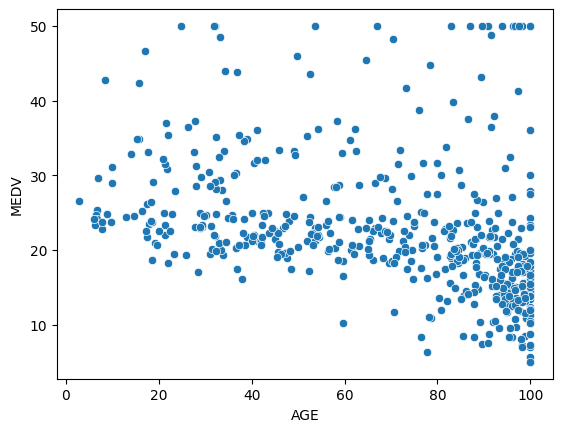

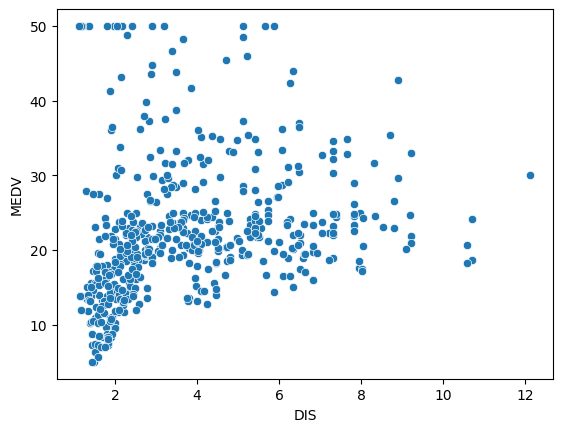

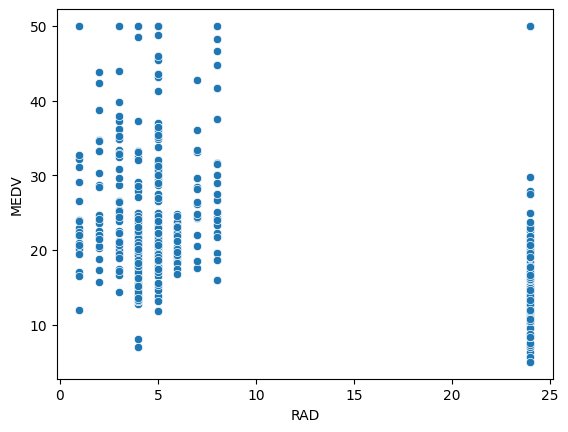

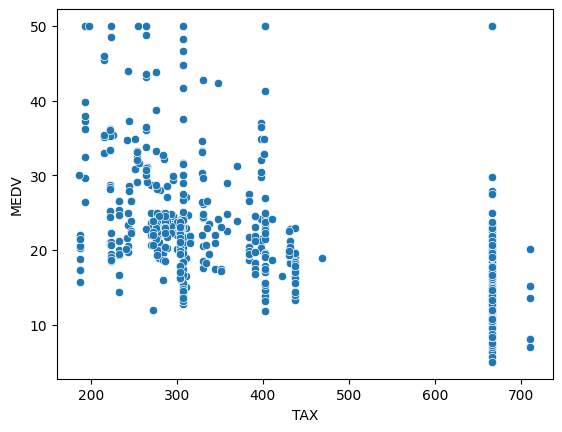

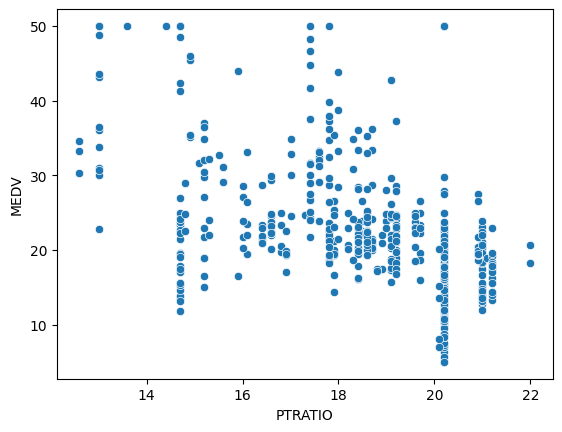

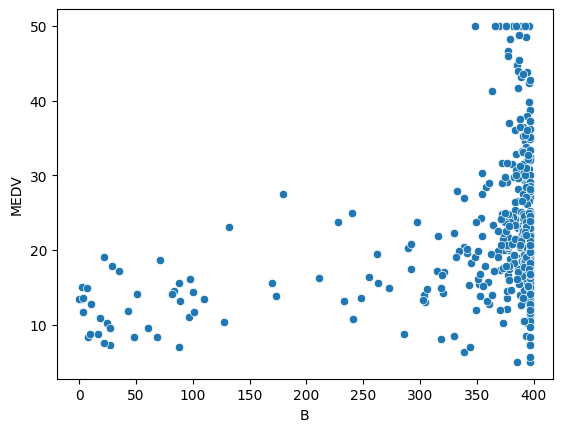

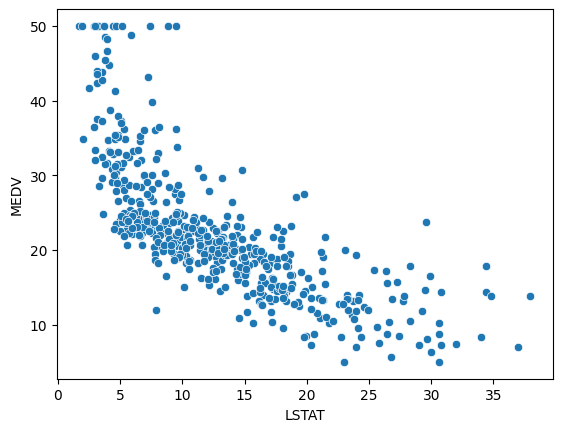

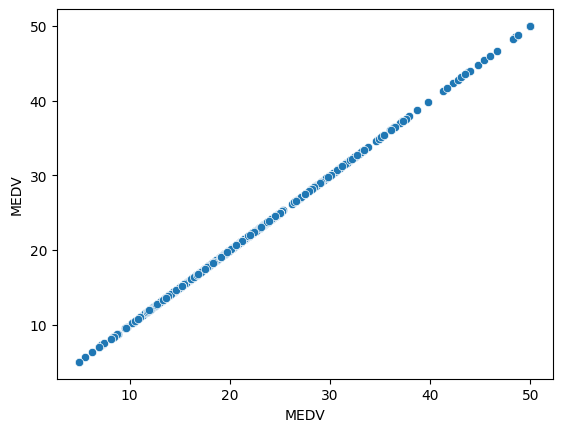

In [ ]:
for i in df:
  sns.scatterplot(data=df, x=i, y='MEDV')
  plt.show()

#Multivariate Analysis

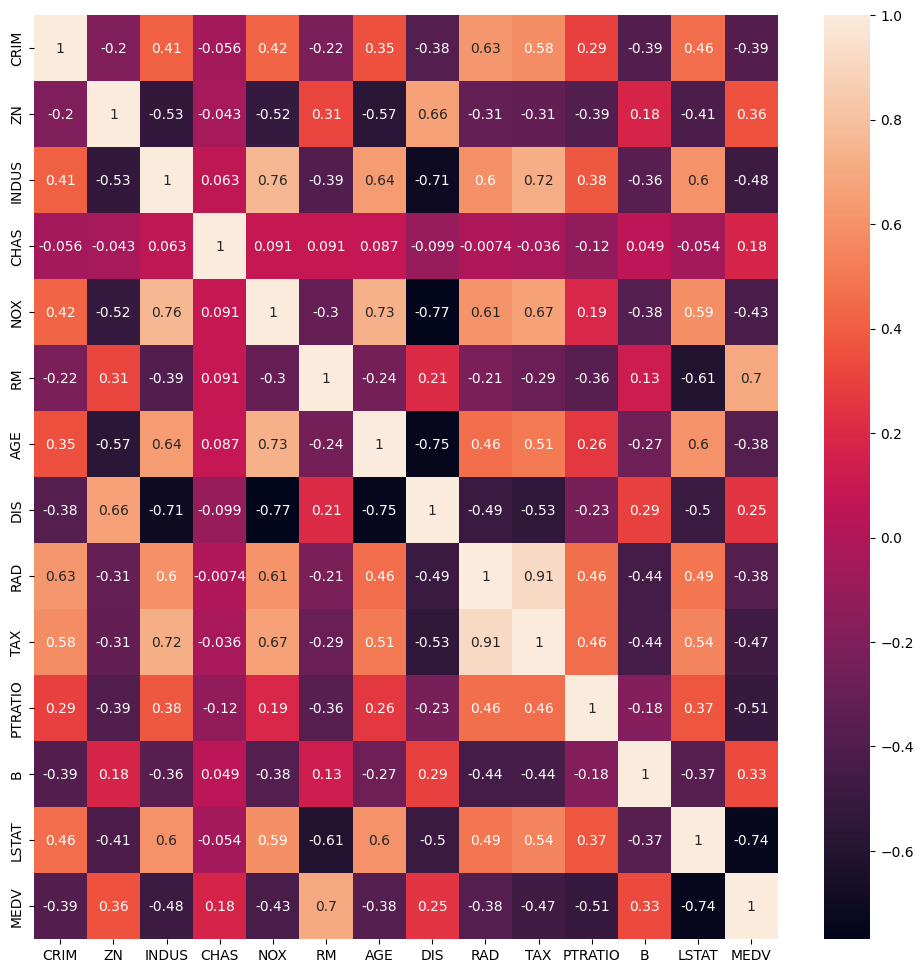

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#there are strong pos and neg corr with some values

#Data Cleaning

##CRIM

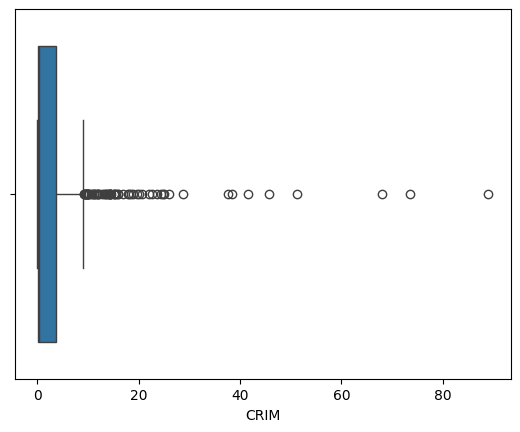

In [ ]:
sns.boxplot(data=df, x='CRIM')
plt.show()

In [ ]:
Q1 = df['CRIM'].quantile(0.25)
Q3 = df['CRIM'].quantile(0.75)
IQR = Q3-Q1
low_lim = int(Q1-1.5*IQR)
upp_lim = Q3+1.5*IQR
print(f'{low_lim}, {upp_lim}')

-5, 9.06963875


In [ ]:
df[df['CRIM']>10].shape[0]

54

##ZN

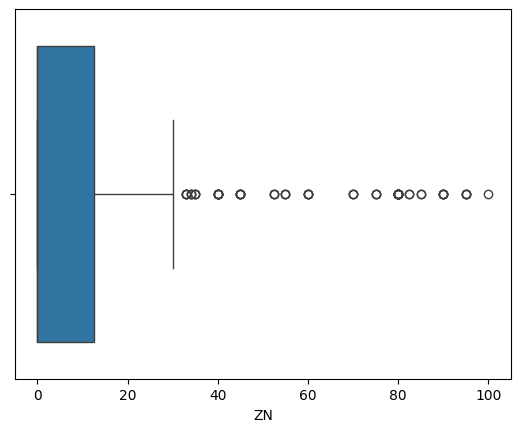

In [ ]:
sns.boxplot(data=df, x='ZN')
plt.show()

In [ ]:
df[df['ZN']>10].shape[0]

134

In [ ]:
#meaningful

##RM

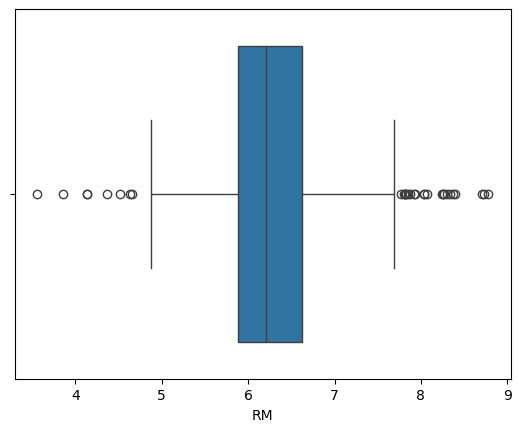

In [ ]:
sns.boxplot(data=df, x='RM')
plt.show()

In [ ]:
Q1 = df['RM'].quantile(0.25)
Q3 = df['RM'].quantile(0.75)
IQR = Q3-Q1
low_lim = int(Q1-1.5*IQR)
upp_lim = Q3+1.5*IQR
print(f'{low_lim}, {upp_lim}')

4, 7.730500000000001


In [ ]:
df[df['RM']>8].shape[0]

13

In [ ]:
df[df['RM']<4.8].shape[0]

8

##DIS

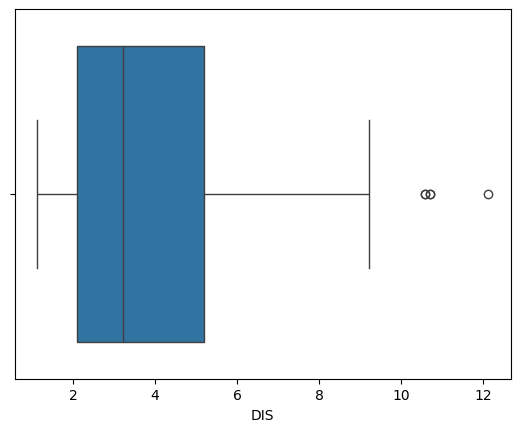

In [ ]:
sns.boxplot(data=df, x='DIS')
plt.show()

In [ ]:
df[df['DIS']>10].shape[0]

5

ptratio

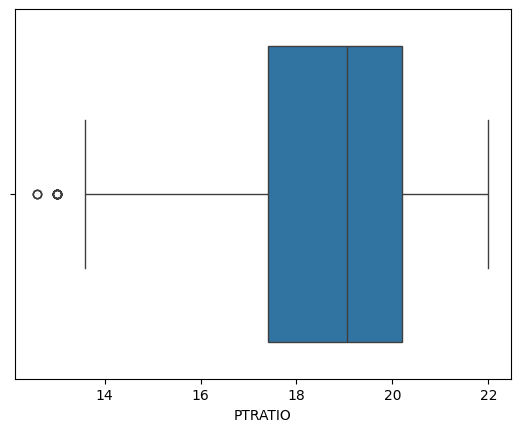

In [ ]:
sns.boxplot(data=df, x='PTRATIO')
plt.show()

In [ ]:
Q1 = df['PTRATIO'].quantile(0.25)
Q3 = df['PTRATIO'].quantile(0.75)
IQR = Q3-Q1
low_lim = int(Q1-1.5*IQR)
print(low_lim)

13


In [ ]:
df[df['PTRATIO']<13].shape[0]

3

##B

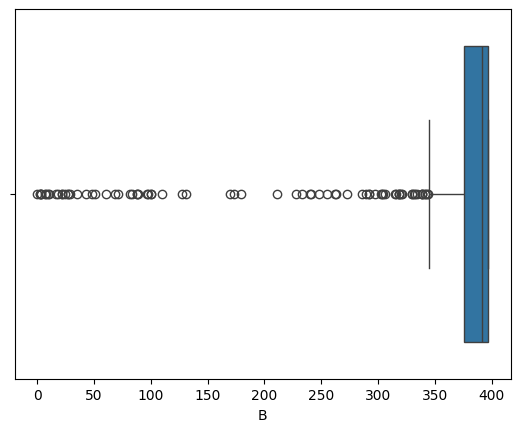

In [ ]:
sns.boxplot(data=df, x='B')
plt.show()

In [ ]:
Q1 = df['B'].quantile(0.25)
Q3 = df['B'].quantile(0.75)
IQR = Q3-Q1
low_lim = int(Q1-1.5*IQR)
print(low_lim)

344


In [ ]:
df[df['B']<344].shape[0]

76

##lstat

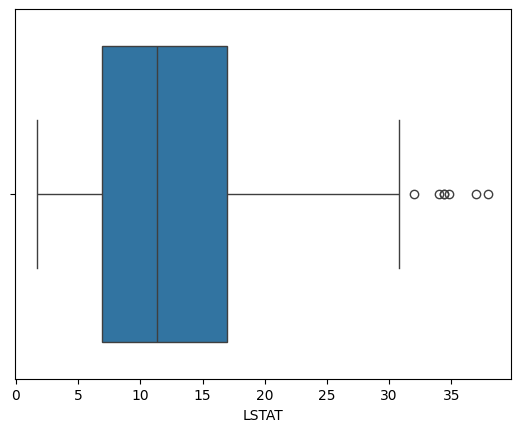

In [ ]:
sns.boxplot(data=df, x='LSTAT')
plt.show()

In [ ]:
Q1 = df['LSTAT'].quantile(0.25)
Q3 = df['LSTAT'].quantile(0.75)
IQR = Q3-Q1
low_lim = int(Q1-1.5*IQR)
upp_lim = Q3+1.5*IQR
print(f'{low_lim}, {upp_lim}')

-8, 31.962500000000006


In [ ]:
df[df['LSTAT']>32].shape[0]

6

final decision -> keep all outliers

---



In [ ]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
df.duplicated().sum()

0

##tax

In [ ]:
df['TAX'] = df['TAX'].astype('int')

#Feature Selection

In [ ]:
#scale the data
#choose algorithms robust to outliers

#Splitting The Data

In [ ]:
x = df.drop('MEDV', axis=1)
y = df['MEDV']

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

#Scale

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Train the model
linear regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 24.291119474973513
R-squared Score: 0.668759493535632


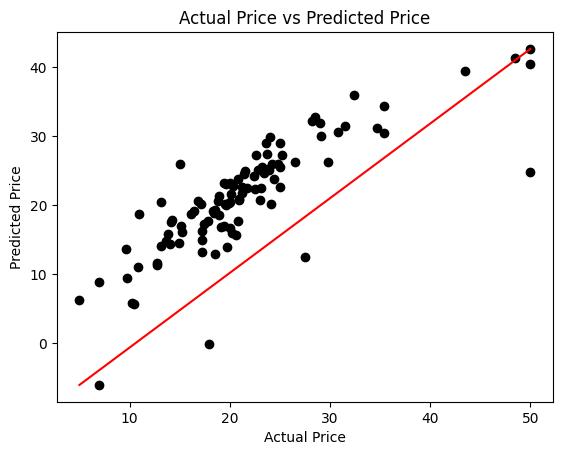

In [ ]:

reg = LinearRegression().fit(x_train, y_train)

prediction = reg.predict(x_test)

plt.scatter(y_test, prediction, color='black')
x0 = min(y_test)
x1 = max(y_test)
y0 = min(prediction)
y1 = max(prediction)
plt.plot([x0, x1], [y0, y1], color="red")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()